In [0]:
import numpy as np
import time
import os

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [0]:
data_path = '/dbfs/FileStore/animals'
window_size = 5

In [0]:
def get_bound(num):
    left, right = 0, 0
    if num == 1:
        return 1, 1
    for i in range(1, num//2+1):
        if num % i == 0:
            left = i
            right = num // i
    
    return left, right

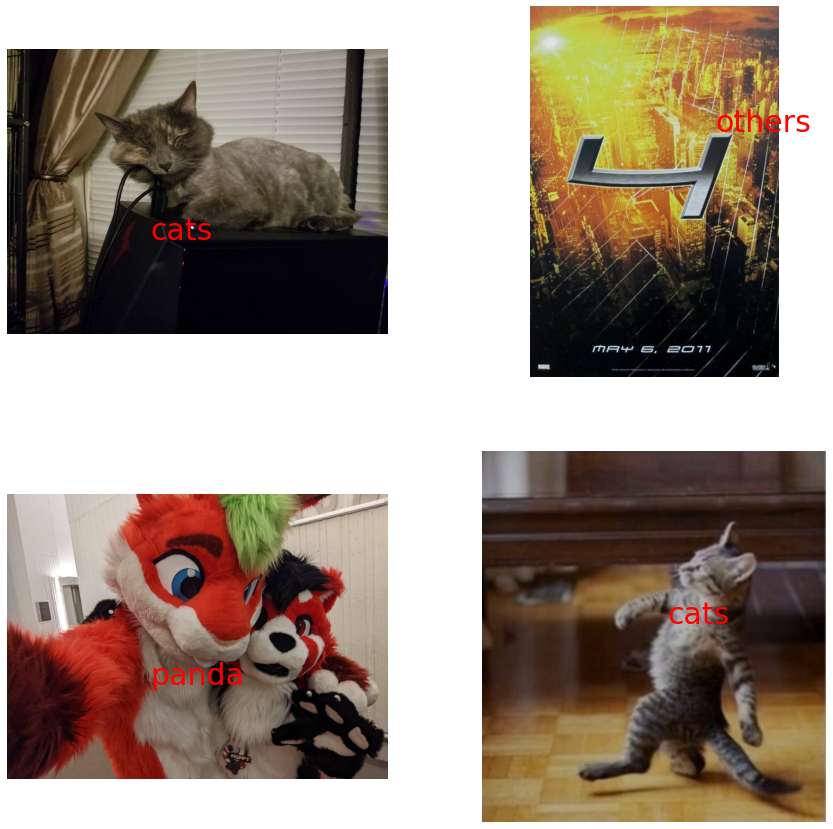

In [0]:
label_refer = ['butterfly','cats','cow','dogs','elephant','hen','horse','monkey','others','panda','sheep','spider','squirrel']
plt.figure(figsize=(15, 15))
while True:
    if len(os.listdir(data_path)) > 0:
        file_path = os.listdir(data_path)
        time.sleep(0.5)
        result = np.load(data_path + '/' + file_path[0], allow_pickle=True)
        total_num = len(result)
        sub_left, sub_right = get_bound(total_num)
        for i in range(len(result)):
            url = result[i][0]
            score = result[i][1]
            label = label_refer[score.index(max(score))]
            
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img = np.asarray(img)
            
            plt.subplot(sub_left, sub_right, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.text(img.shape[0] // 2, img.shape[1] // 2, label, c='r', fontsize=30)
        plt.show()

#         Delete file
        file_name = os.path.join(data_path, file_path[0])
        file_name = 'dbfs:' + file_name[5:]
        dbutils.fs.rm(file_name)
        time.sleep(5)
    else:
        time.sleep(1)